## かめさん講座　機械学習入門
#### 33.LightGBM

In [1]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 2.4 MB/s eta 0:00:01     |█████████████████▉              | 1.1 MB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb

from sklearn.model_selection import train_test_split

In [3]:
df = sns.load_dataset('titanic')
# XGBoostと同じくLightGBMでは欠損値に対応できている
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# 学習
model = lgb.LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [6]:
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[1]	valid_0's binary_logloss: 0.618911
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.585485
[3]	valid_0's binary_logloss: 0.558875
[4]	valid_0's binary_logloss: 0.537704
[5]	valid_0's binary_logloss: 0.519073
[6]	valid_0's binary_logloss: 0.503079
[7]	valid_0's binary_logloss: 0.489481
[8]	valid_0's binary_logloss: 0.478097
[9]	valid_0's binary_logloss: 0.468913
[10]	valid_0's binary_logloss: 0.46083
[11]	valid_0's binary_logloss: 0.454961
[12]	valid_0's binary_logloss: 0.448297
[13]	valid_0's binary_logloss: 0.443706
[14]	valid_0's binary_logloss: 0.439395
[15]	valid_0's binary_logloss: 0.43847
[16]	valid_0's binary_logloss: 0.439082
[17]	valid_0's binary_logloss: 0.436798
[18]	valid_0's binary_logloss: 0.434473
[19]	valid_0's binary_logloss: 0.43018
[20]	valid_0's binary_logloss: 0.428601
[21]	valid_0's binary_logloss: 0.426797
[22]	valid_0's binary_logloss: 0.426168
[23]	valid_0's binary_logloss: 0.423197
[24]	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [7]:
# 予測と評価
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.4120060817703395

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

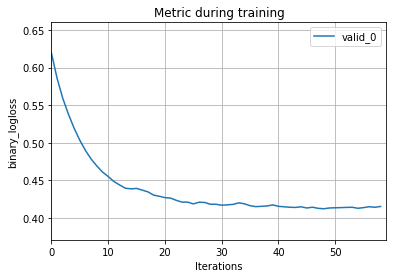

In [8]:
# 学習曲線
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

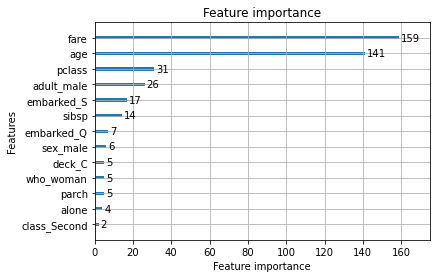

In [9]:
# 特徴量の重要度
lgb.plot_importance(model)